# Set-up, Framework and varification

In [1]:
#IMPORTS
import time
import random
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy import spatial
import copy
import operator
import pandas as pd
import numpy as np

#READ IN FILE TO LIST

def att48_to_nx3_list(filename):

    with open(filename) as f:
        att48 = f.readlines()

    #Rejects document text 
    pre_size = len(att48)
    att48 =att48[6:pre_size-1] 
    post_size = len(att48)
    
    #separates and splits numbers into list array[cityNUM, xcoord, ycoord]
    #split each line into 3 colums cityID, x_coord, y_coord
    for i in range (post_size):
        att48[i] = att48[i].split()
    
    #Convert all strings in array to ints 
    for i in range (post_size):
        att48[i][0] = int(att48[i][0])
        att48[i][1] = int(att48[i][1])
        att48[i][2] = int(att48[i][2])
         
    return att48

def plot_cities(cities_list):
    
    cityIDs = []
    x = []
    y = []
        
    for i in range (len(cities_list)):
        cityIDs.append(cities_list[i][0])
        x.append(cities_list[i][1])
        y.append(cities_list[i][2])
    
    plt.plot(x, y, 'k-')
    plt.show()


def read_optimum_tour_index(opt_file):
    

    with open(opt_file) as f:
        att48 = f.readlines()
        
    #Rejects document text 
    pre_size = len(att48)
    att48 =att48[5:pre_size-2] 
    post_size = len(att48)
    
    #separates and splits numbers into list array[cityNUM, xcoord, ycoord]
    #split each line into 3 colums cityID, x_coord, y_coord
    for i in range (post_size):
        att48[i] = att48[i].split()
    
    #Convert all strings in array to ints 
    for i in range (post_size):
        att48[i][0]= int(att48[i][0])
           
    return att48


def sort_to_index(cities, index):
    
    #intilize list
    sorted_cities = []
    
    #initilze list size
    for i in range (len(index)):
        sorted_cities.append([0,0,0])
        
    #rearrange city index to optimum solution
    for i in range (len(index)):
        sorted_cities[i][0] = cities[index[i][0]-1][0]
        sorted_cities[i][1] = cities[index[i][0]-1][1]
        sorted_cities[i][2] = cities[index[i][0]-1][2]
    
    return sorted_cities


def pseudo_euclidean_distance(point_1, point_2):
    
    x1 = point_1[0]
    y1 = point_1[1]
    x2 = point_2[0]
    y2 = point_2[1]
    
    xd = x1 - x2;
    yd = y1 - y2;
    rij = (((xd*xd + yd*yd)/10.0)**(1/2))
    tij = np.rint(rij);
    
    if (tij<rij):
        dij = tij + 1;
    else:
        dij = tij;
    
    return dij


def cal_tour_distance(tour_solution): 
    Total_distance = 0
    
    new_tour_sol = tour_solution
    
    
    #new_tour_sol.append(new_tour_sol[0])
    
    for i in range (len(new_tour_sol)-1):
        
        x1 = new_tour_sol[i][1]
        y1 = new_tour_sol[i][2]
        x2 = new_tour_sol[i+1][1]
        y2 = new_tour_sol[i+1][2]
        
        point_1 = [x1, y1]
        point_2 = [x2, y2]
        
        Total_distance = Total_distance + pseudo_euclidean_distance(point_1, point_2)
        
    return Total_distance


#probabilty of accepting worse solution 
def cal_probabilty_accept(temperature, tour_best, tour_new):
    return math.exp((tour_best-tour_new)/temperature)

In [2]:
#OPT-FILE

post cities_list3 48
post cities_list4 48


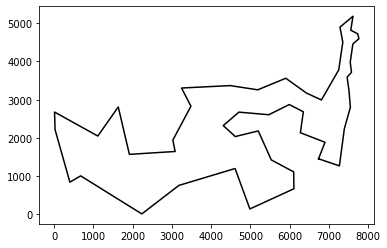

post cities_list5 48
OPTIMUM SCORE  10628.0
INITIAL SCORE  48656.0
post cities_list6 48


In [3]:
opt_file = "att48.opt.tour"
optimum_city_index = read_optimum_tour_index(opt_file)

filename = "att48.tsp" 
cities_list = att48_to_nx3_list(filename)  

#add starting position to the end, to complete circuit of TSP

#sort cities 
optimum_solution_cities = sort_to_index(cities_list, optimum_city_index)   
optimum_solution_cities.append(optimum_solution_cities[0])
plot_cities(optimum_solution_cities)

print("OPTIMUM SCORE ",cal_tour_distance(optimum_solution_cities))
print("INITIAL SCORE ",cal_tour_distance(cities_list))
